# Visualization of Figure 5

Load packages

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import matplotlib.dates as md
from sklearn.preprocessing import MinMaxScaler
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import matplotlib.dates as mdates
plt.rcParams["font.family"] = "Times New Roman"

Load stringency index and standardize

In [38]:
data = pd.read_csv('../data/0_input_data/stringency_index/OxCGRT_BRA_latest LEGACY.csv', sep=';')
data['Date'] = pd.to_datetime(data['Date'], format= '%d.%m.%Y')
data.set_index('Date', inplace=True)
data = data[['StringencyIndex']]
data = data.loc[datetime.date(year=2020,month=4,day=6):datetime.date(year=2022,month=6,day=30)]
scaler = MinMaxScaler()
data['StringencyIndex'] = scaler.fit_transform(data[['StringencyIndex']])
data_scaled = data

Load mobility metrics and calcualte trend

In [39]:
mobility = pd.read_csv('../data/2_final_output/daily_mobility_metrics_from_mobile_phone_data.csv', sep=';',decimal=',')
mobility['date'] = pd.to_datetime(mobility['date'], format= '%Y-%m-%d')
mobility.set_index('date', inplace=True)
mobility['amount of movements 28d moving average'] = mobility['amount of movements'].rolling(28).mean().shift(-14)
mobility['average distance 28d moving average'] = mobility['average distance'].rolling(28).mean().shift(-14)
mobility['Modularity 28d moving average'] = mobility['Modularity'].rolling(28).mean().shift(-14)
mobility['Residential 28d moving average'] = mobility['Residential'].rolling(28).mean().shift(-14)
mobility['Radius of Gyration 28d moving average'] = mobility['Radius of Gyration'].rolling(28).mean().shift(-14)
mobility_selected = mobility[['amount of movements 28d moving average','average distance 28d moving average','Modularity 28d moving average'\
                    ,'Residential 28d moving average', 'Radius of Gyration 28d moving average']]                                            
mobility_selected = mobility_selected.loc[datetime.date(year=2020,month=4,day=6):datetime.date(year=2022,month=6,day=30)]
scaler = MinMaxScaler()
mobility_scaled = pd.DataFrame(scaler.fit_transform(mobility_selected), columns=mobility_selected.columns)
mobility_scaled.index = data_scaled.index

Plot stringency index  with graph modularity metric

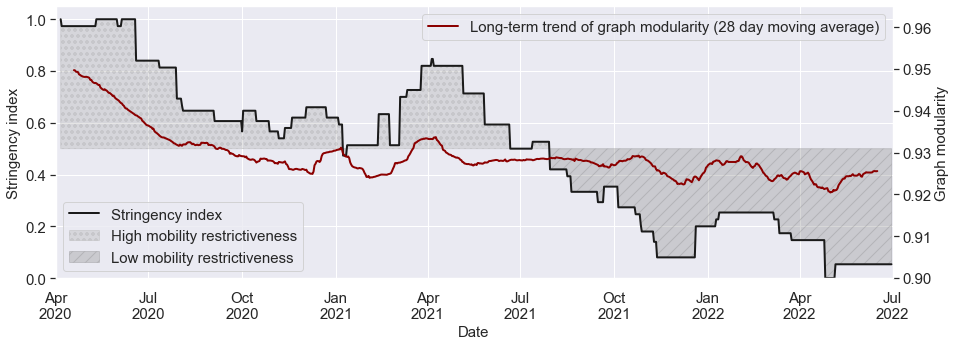

In [40]:
fig, ax1 = plt.subplots(figsize = (15, 5))
ax2 = ax1.twinx()
ls1 = ax1.plot(data_scaled.index, data_scaled.StringencyIndex, color='k', linewidth=2,label ='Stringency index')
ls3 = ax2.plot(mobility['Modularity 28d moving average'],color='darkred', linewidth=2, label ='Long-term trend of graph modularity (28 day moving average)')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.set_xlim([datetime.date(2020, 4, 1), datetime.date(2022, 7, 1)])
ax1.set_ylim([0, 1.05])
ax2.set_ylim([0.9, 0.965])
required_run_rate = 0.5
z1 = np.array(data_scaled.StringencyIndex)
z2 = np.array([required_run_rate] * 816) 
a = ax1.fill_between(data_scaled.index, data_scaled.StringencyIndex, 0.5,  where=(z1 >= z2),   alpha=0.30, hatch="oo",color='darkgrey', label='High mobility restrictiveness')
ax1.fill_between(data_scaled.index, data_scaled.StringencyIndex, 0.5,    where=(z1 < z2),  alpha=0.30, hatch='//',color='grey', interpolate=True, label='Low mobility restrictiveness')
ax1.xaxis.set_major_locator(md.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
plt.setp(ax1.xaxis.get_majorticklabels(), size= 15)
plt.setp(ax1.yaxis.get_majorticklabels(), size= 15)
plt.setp(ax2.yaxis.get_majorticklabels(), size= 15)
ax1.legend(loc=3,prop={'size': 15})
plt.setp(ax1.get_legend().get_texts(), fontsize='15') 
plt.setp(ax1.get_legend().get_title(), fontsize='15') 
ax2.legend(loc=1,prop={'size': 15})
plt.setp(ax2.get_legend().get_texts(), fontsize='15')
plt.setp(ax2.get_legend().get_title(), fontsize='15') 
ax1.grid(True)
ax2.grid(False)
ax1.set_xlabel('Date', size = 15)
ax1.set_ylabel('Stringency index', size = 15)
ax2.set_ylabel('Graph modularity', size = 15)
ax1.tick_params(axis = 'x', which = 'major', length = 9)
plt.show()

Plot moving average for all metrics

<AxesSubplot:xlabel='Date'>

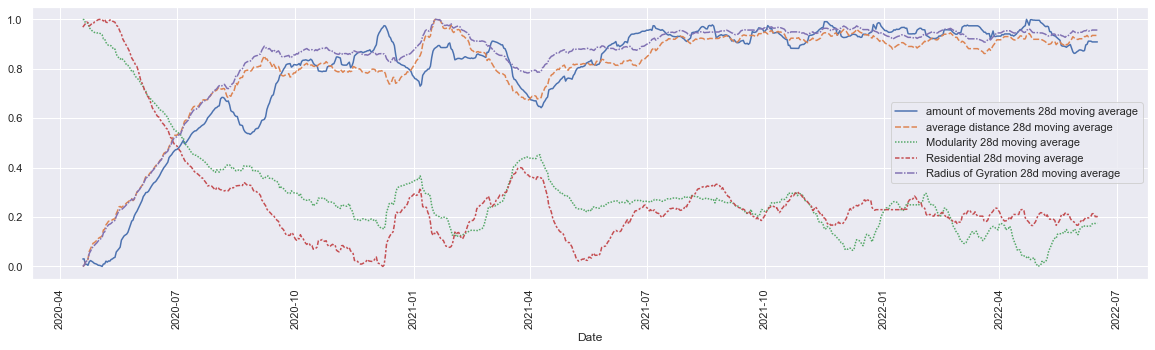

In [41]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(rotation=90)
sns.lineplot(data = mobility_scaled)

Calculate correlation values between mobility metrics and the stringency index

In [42]:
print(data_scaled['StringencyIndex'].corr(mobility_scaled['amount of movements 28d moving average']))
print(data_scaled['StringencyIndex'].corr(mobility_scaled['average distance 28d moving average']))
print(data_scaled['StringencyIndex'].corr(mobility_scaled['Modularity 28d moving average']))
print(data_scaled['StringencyIndex'].corr(mobility_scaled['Residential 28d moving average']))
print(data_scaled['StringencyIndex'].corr(mobility_scaled['Radius of Gyration 28d moving average']))

-0.7581675211007836
-0.7634032800912595
0.772212495346636
0.4895267867999449
-0.7172869528726917
